# Telco Customer Dataset - Churn predcition using Decison Tree

In [20]:
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("rpart")
# install.packages("rattle")
# install.packages("rpart.plot")
# install.packages("RColorBrewer")
# install.packages("party")
# install.packages("partykit")
# install.packages("caret")
# install.packages("heuristica")

In [21]:
library(ggplot2)
library(dplyr)
library(rpart)
# library(dummies)
# library(rattle)
library(rpart.plot)
library(heuristica)
# library(RColorBrewer)
# library(party)
# library(partykit)
# library(caret)

## Reading dataset

In [22]:
data.set.orig = read.csv(file="Datasets/Teleco_Cust_Attr.csv",header = T)
str(data.set.orig)
summary(data.set.orig)
prop.table(table(data.set.orig$Churn))

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             


       No       Yes 
0.7346301 0.2653699 

## Data preprocessing

In [23]:
data.set.orig$customerID = NULL
sapply(data.set.orig,function(x){sum(is.na(x))})

gender    SeniorCitizen          Partner       Dependents 
               0                0                0                0 
          tenure     PhoneService    MultipleLines  InternetService 
               0                0                0                0 
  OnlineSecurity     OnlineBackup DeviceProtection      TechSupport 
               0                0                0                0 
     StreamingTV  StreamingMovies         Contract PaperlessBilling 
               0                0                0                0 
   PaymentMethod   MonthlyCharges     TotalCharges            Churn 
               0                0               11                0

### Handling nulls

In [24]:
data.set.orig$TotalCharges = ifelse(is.na(data.set.orig$TotalCharges),data.set.orig$MonthlyCharges*data.set.orig$tenure,data.set.orig$TotalCharges)

In [26]:
unique(data.set.orig$SeniorCitizen)
data.set.orig$SeniorCitizen = as.factor(data.set.orig$SeniorCitizen)

[1] 0 1

## Merging categories

In [7]:
# data.set$OnlineSecurity=="No internet service"
# data.set[data.set$OnlineSecurity=="No internet service",]

In [8]:
# data.set$InternetService = as.character(data.set$InternetService)
# data.set[data.set$InternetService!="No",c("InternetService")]="Yes"
# data.set$InternetService = as.factor(data.set$InternetService)

# data.set$MultipleLines = as.character(data.set$MultipleLines)
# data.set[data.set$MultipleLines=="No phone service",c("MultipleLines")]="No"
# data.set$MultipleLines = as.factor(data.set$MultipleLines)

# data.set$OnlineSecurity = as.character(data.set$OnlineSecurity)
# data.set[data.set$OnlineSecurity=="No internet service",c("OnlineSecurity")]="No"
# data.set$OnlineSecurity = as.factor(data.set$OnlineSecurity)

# data.set$OnlineBackup = as.character(data.set$OnlineBackup)
# data.set[data.set$OnlineBackup=="No internet service",c("OnlineBackup")]="No"
# data.set$OnlineBackup = as.factor(data.set$OnlineBackup)


# data.set$DeviceProtection = as.character(data.set$DeviceProtection)
# data.set[data.set$DeviceProtection=="No internet service",c("DeviceProtection")]="No"
# data.set$DeviceProtection = as.factor(data.set$DeviceProtection)

# data.set$TechSupport = as.character(data.set$TechSupport)
# data.set[data.set$TechSupport=="No internet service",c("TechSupport")]="No"
# data.set$TechSupport = as.factor(data.set$TechSupport)

# data.set$StreamingTV = as.character(data.set$StreamingTV)
# data.set[data.set$StreamingTV=="No internet service",c("StreamingTV")]="No"
# data.set$StreamingTV = as.factor(data.set$StreamingTV)


# data.set$StreamingMovies = as.character(data.set$StreamingMovies)
# data.set[data.set$StreamingMovies=="No internet service",c("StreamingMovies")]="No"
# data.set$StreamingMovies = as.factor(data.set$StreamingMovies)


In [27]:
str(data.set.orig)
table(data.set.orig$Contract,data.set.orig$Churn)


data.set.orig$Contract = as.character(data.set.orig$Contract)
data.set = data.set.orig[data.set.orig$Contract=="Month-to-month",]
data.set.orig$Contract = as.factor(data.set.orig$Contract)
data.set$Contract = as.factor(data.set$Contract)
nrow(data.set)
str(data.set)
table(data.set$Contract,data.set$Churn)

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

                
                   No  Yes
  Month-to-month 2220 1655
  One year       1307  166
  Two year       1647   48

[1] 3875

'data.frame':	3875 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 1 1 2 1 1 2 2 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 2 2 1 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 2 1 1 ...
 $ tenure          : int  1 2 2 8 22 10 28 13 49 25 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 2 2 1 2 2 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 3 3 2 3 1 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 2 2 2 1 2 1 2 2 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 1 1 1 3 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 3 1 1 3 1 1 1 3 1 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 1 1 3 1 1 3 1 3 3 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

                
                   No  Yes
  Month-to-month 2220 1655

## Test Train Split for Month-to-month

In [28]:
set.seed(987)
sample = sample(1:nrow(data.set),size=.7*nrow(data.set))
train.data.set = data.set[sample,]
test.data.set = data.set[-sample,]
nrow(data.set)
nrow(train.data.set)
nrow(test.data.set)

[1] 3875

[1] 2712

[1] 1163

## Decision Tree

In [29]:
dec.tree.1 = rpart( Churn ~ . , data=train.data.set,  method = "class")
summary(dec.tree.1)
dec.tree.1$variable.importance

Call:
rpart(formula = Churn ~ ., data = train.data.set, method = "class")
  n= 2712 

          CP nsplit rel error    xerror       xstd
1 0.12253642      0 1.0000000 1.0000000 0.02209449
2 0.11053985      1 0.8774636 0.9391602 0.02189829
3 0.01285347      2 0.7669237 0.7832048 0.02109367
4 0.01156812      4 0.7412168 0.7969152 0.02118262
5 0.01028278      7 0.7043702 0.7866324 0.02111625
6 0.01000000      8 0.6940874 0.7746358 0.02103622

Variable importance
  MonthlyCharges  InternetService           tenure     TotalCharges 
              17               16               16               14 
    OnlineBackup    MultipleLines   OnlineSecurity      TechSupport 
               8                7                7                7 
   PaymentMethod          Partner DeviceProtection      StreamingTV 
               2                2                2                2 

Node number 1: 2712 observations,    complexity param=0.1225364
  predicted class=No   expected loss=0.4303097  P(node) =

MonthlyCharges  InternetService           tenure     TotalCharges 
     108.3204411      105.5781394      105.2410819       91.0928617 
    OnlineBackup    MultipleLines   OnlineSecurity      TechSupport 
      52.1494337       48.5739588       46.1189638       44.5473794 
   PaymentMethod          Partner DeviceProtection      StreamingTV 
      13.1189792       12.3170616       12.3143126       12.3143126 
 StreamingMovies 
       0.2336177

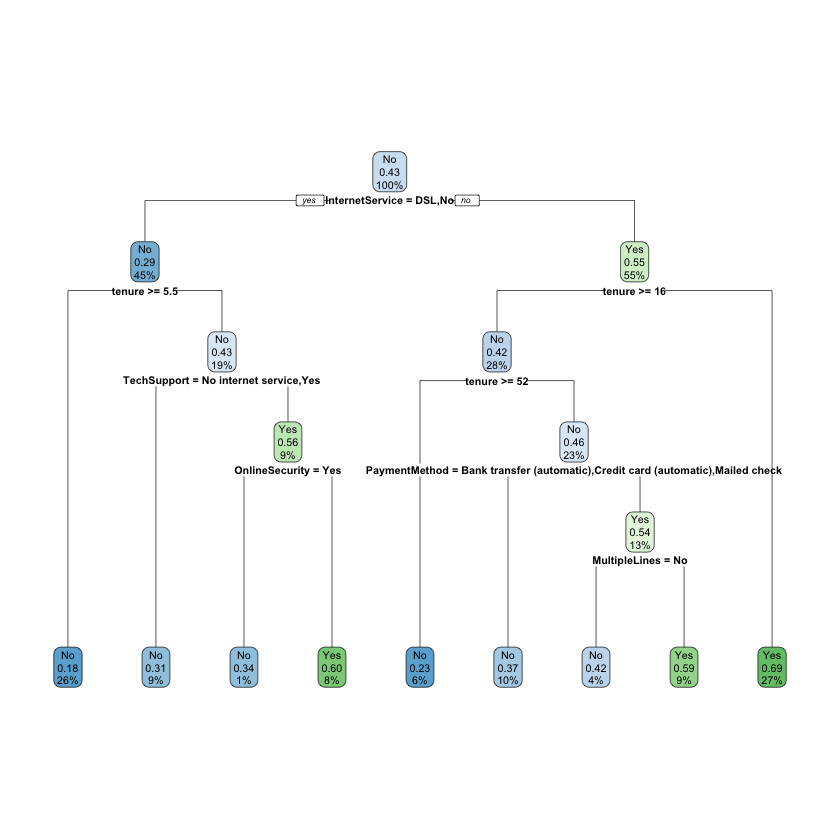

In [30]:
rpart.plot(dec.tree.1)
# ?rpart

In [31]:
## Predictions
pred.train.data.set = as.data.frame(train.data.set$Churn)
colnames(pred.train.data.set)[1] = "Churn"
pred.train.data.set$Churn.pred = predict(dec.tree.1,newdata = train.data.set,type="class")
head(pred.train.data.set)
table(pred.train.data.set$Churn)

Churn,Churn.pred
No,No
No,No
Yes,Yes
No,No
No,Yes
No,No



  No  Yes 
1545 1167 

In [32]:
table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)
tr.TN = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[1]
tr.FP = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[3]
tr.FN = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[2]
tr.TP = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[4]

tr.TN
tr.FP
tr.FN
tr.TP

tr.Accuray = (tr.TN+tr.TP)/(tr.TN+tr.TP+tr.FN+tr.FP)
tr.Precision = (tr.TP)/(tr.TP+tr.FP)
tr.Recall = (tr.TP)/(tr.TP+tr.FN)
tr.F1 = 2*tr.Precision*tr.Recall/(tr.Precision+tr.Recall)

tr.Accuray
tr.Precision
tr.Recall
tr.F1

     
        No  Yes
  No  1136  409
  Yes  401  766

[1] 1136

[1] 409

[1] 401

[1] 766

[1] 0.7013274

[1] 0.6519149

[1] 0.6563839

[1] 0.6541418

In [33]:
## Predictions
pred.test.data.set = as.data.frame(test.data.set$Churn)
colnames(pred.test.data.set)[1] = "Churn"
pred.test.data.set$Churn.pred = predict(dec.tree.1,newdata = test.data.set,type="class")
# head(pred.test.data.set)
table(pred.test.data.set$Churn)
nrow(pred.test.data.set)


 No Yes 
675 488 

[1] 1163

In [34]:
table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)
tt.TN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[1]
tt.FP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[3]
tt.FN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[2]
tt.TP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[4]

tt.Precision = (tt.TP)/(tt.TP+tt.FP)
tt.Accuray = (tt.TN+tt.TP)/(tt.TN+tt.TP+tt.FN+tt.FP)
tt.Recall = (tt.TP)/(tt.TP+tt.FN)
tt.F1 = 2*tt.Precision*tt.Recall/(tt.Precision+tt.Recall)

tt.Accuray
tt.Precision
tt.Recall
tt.F1

     
       No Yes
  No  482 193
  Yes 167 321

[1] 0.6904557

[1] 0.6245136

[1] 0.6577869

[1] 0.6407186

## Test Train Split for Not Month-to-month

In [37]:
str(data.set.orig)
table(data.set.orig$Contract,data.set.orig$Churn)

data.set.orig$Contract = as.character(data.set.orig$Contract)
data.set = data.set.orig[!(data.set.orig$Contract=="Month-to-month"),]
data.set.orig$Contract = as.factor(data.set.orig$Contract)

data.set$Contract = as.factor(data.set$Contract)
nrow(data.set)
str(data.set)
table(data.set$Contract,data.set$Churn)
table(data.set$Churn)
data.set$Contract = NULL

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

                
                   No  Yes
  Month-to-month 2220 1655
  One year       1307  166
  Two year       1647   48

[1] 3168

'data.frame':	3168 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 2 2 1 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 2 1 1 2 2 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 2 1 2 1 1 ...
 $ tenure          : int  34 45 62 16 58 69 52 71 12 58 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 1 2 1 1 3 3 1 3 1 3 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 3 2 2 3 2 3 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 3 3 3 2 1 3 2 3 2 1 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 1 1 3 2 1 3 2 1 2 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 3 3 1 2 3 3 2 3 2 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No in

          
             No  Yes
  One year 1307  166
  Two year 1647   48


  No  Yes 
2954  214 

In [38]:
set.seed(987)
sample = sample(1:nrow(data.set),size=.7*nrow(data.set))
train.data.set = data.set[sample,]
test.data.set = data.set[-sample,]
nrow(data.set)
nrow(train.data.set)
nrow(test.data.set)

[1] 3168

[1] 2217

[1] 951

## Decision Tree

In [41]:
dec.tree.1 = rpart( Churn ~ . , data=train.data.set,  method = "class")
summary(dec.tree.1)
dec.tree.1$variable.importance

Call:
rpart(formula = Churn ~ ., data = train.data.set, method = "class")
  n= 2217 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0

Node number 1: 2217 observations
  predicted class=No  expected loss=0.06630582  P(node) =1
    class counts:  2070   147
   probabilities: 0.934 0.066 



NULL

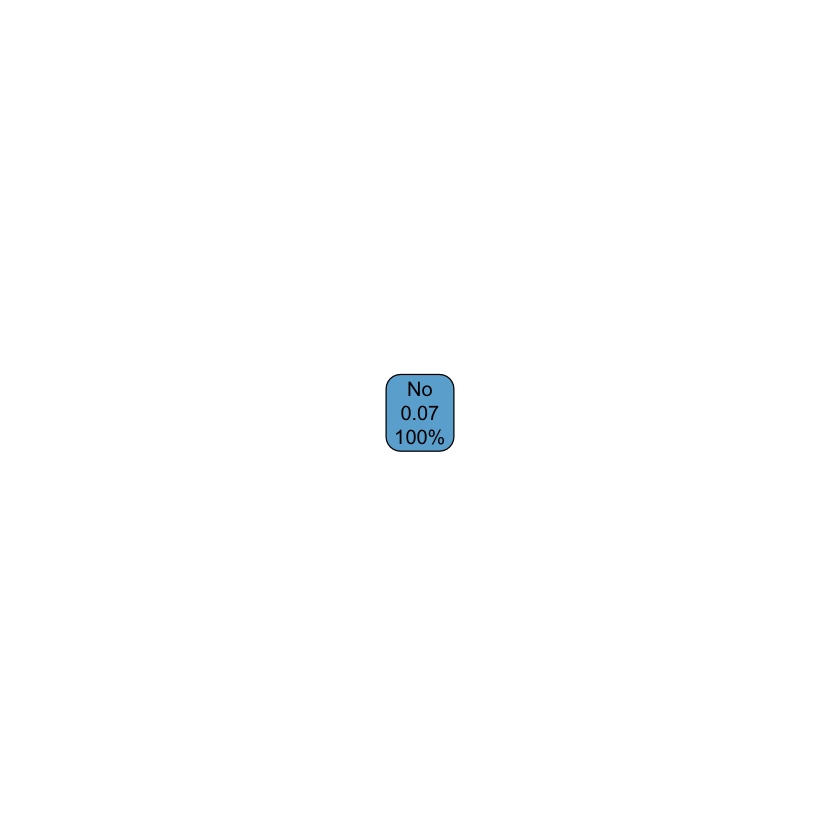

In [42]:
rpart.plot(dec.tree.1)
# ?rpart

In [43]:
## Predictions
pred.train.data.set = as.data.frame(train.data.set$Churn)
colnames(pred.train.data.set)[1] = "Churn"
pred.train.data.set$Churn.pred = predict(dec.tree.1,newdata = train.data.set,type="class")
head(pred.train.data.set)
table(pred.train.data.set$Churn)

Churn,Churn.pred
No,No
No,No
No,No
No,No
No,No
No,No



  No  Yes 
2070  147 

In [44]:
table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)
tr.TN = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[1]
tr.FP = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[3]
tr.FN = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[2]
tr.TP = table(pred.train.data.set$Churn,pred.train.data.set$Churn.pred)[4]

tr.TN
tr.FP
tr.FN
tr.TP

tr.Accuray = (tr.TN+tr.TP)/(tr.TN+tr.TP+tr.FN+tr.FP)
tr.Precision = (tr.TP)/(tr.TP+tr.FP)
tr.Recall = (tr.TP)/(tr.TP+tr.FN)
tr.F1 = 2*tr.Precision*tr.Recall/(tr.Precision+tr.Recall)

tr.Accuray
tr.Precision
tr.Recall
tr.F1

     
        No  Yes
  No  2070    0
  Yes  147    0

[1] 2070

[1] 0

[1] 147

[1] 0

[1] 0.9336942

[1] NaN

[1] 0

[1] NaN

In [45]:
## Predictions
pred.test.data.set = as.data.frame(test.data.set$Churn)
colnames(pred.test.data.set)[1] = "Churn"
pred.test.data.set$Churn.pred = predict(dec.tree.1,newdata = test.data.set,type="class")
# head(pred.test.data.set)
table(pred.test.data.set$Churn)
nrow(pred.test.data.set)


 No Yes 
884  67 

[1] 951

In [46]:
table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)
tt.TN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[1]
tt.FP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[3]
tt.FN = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[2]
tt.TP = table(pred.test.data.set$Churn,pred.test.data.set$Churn.pred)[4]

tt.TN
tt.FP
tt.FN
tt.TP

tt.Precision = (tt.TP)/(tt.TP+tt.FP)
tt.Accuray = (tt.TN+tt.TP)/(tt.TN+tt.TP+tt.FN+tt.FP)

tt.Recall = (tt.TP)/(tt.TP+tt.FN)
tt.F1 = 2*tt.Precision*tt.Recall/(tt.Precision+tt.Recall)

tt.Accuray
tt.Precision
tt.Recall
tt.F1

     
       No Yes
  No  884   0
  Yes  67   0

[1] 884

[1] 0

[1] 67

[1] 0

[1] 0.9295478

[1] NaN

[1] 0

[1] NaN

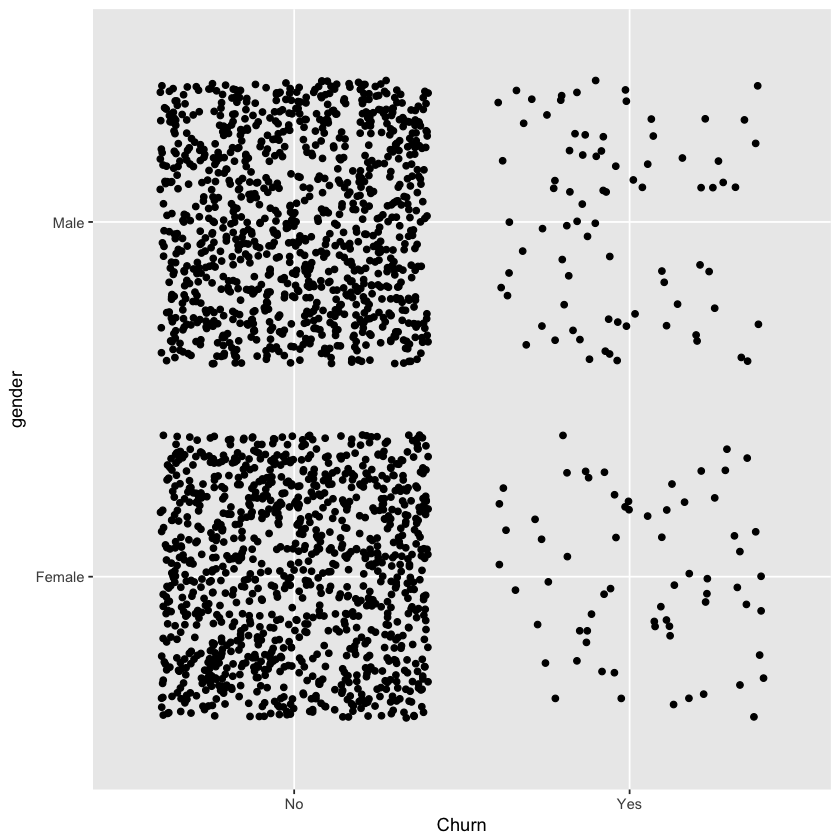

In [48]:
ggplot(train.data.set,aes(Churn,gender))+geom_jitter()